**Task -7 :-  Time-Based Historical Image Colorization**

In [ ]:
!pip install -q opencv-python-headless pillow matplotlib


In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
from google.colab import files


In [ ]:
# Dummy era list and color tones (approximate, for demo)
eras = ["1880s", "1900s", "1920s", "1940s", "1960s"]
era_colors = {
    "1880s": (180, 150, 120),
    "1900s": (170, 130, 100),
    "1920s": (160, 120, 90),
    "1940s": (150, 100, 70),
    "1960s": (140, 90, 60),
}

# Simulate an era classifier
def predict_era(gray_image):
    return random.choice(eras)


In [ ]:
def colorize_by_era(gray_image, era):
    color = era_colors[era]
    h, w = gray_image.shape
    color_layer = np.full((h, w, 3), color, dtype=np.uint8)
    gray_3ch = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)
    return cv2.addWeighted(gray_3ch, 0.5, color_layer, 0.5, 0)


In [ ]:
uploaded = files.upload()
file_path = next(iter(uploaded))

# Read image as grayscale
gray_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
predicted_era = predict_era(gray_image)
print(f"🔍 Predicted Era: {predicted_era}")

# Generate colorized image
colorized_image = colorize_by_era(gray_image, predicted_era)


Saving old.jpg to old.jpg
🔍 Predicted Era: 1940s


In [ ]:
def show_images(gray, colorized, era, upscale_factor=2):
    import matplotlib.pyplot as plt
    import cv2
    import numpy as np

    # Upscale images for better display (optional)
    def upscale(img, factor=2):
        h, w = img.shape[:2]
        return cv2.resize(img, (w * factor, h * factor), interpolation=cv2.INTER_CUBIC)

    # Convert grayscale to 3-channel float32 for accurate rendering
    gray_up = upscale(gray, upscale_factor)
    colorized_up = upscale(colorized, upscale_factor)

    # Normalize grayscale image
    if gray_up.ndim == 2:
        gray_rgb = cv2.cvtColor(gray_up, cv2.COLOR_GRAY2RGB) / 255.0
    else:
        gray_rgb = gray_up / 255.0

    # Normalize colorized image
    colorized_rgb = cv2.cvtColor(colorized_up, cv2.COLOR_BGR2RGB) / 255.0

    # Plotting
    fig, ax = plt.subplots(1, 2, figsize=(14, 7), dpi=100)
    ax[0].imshow(gray_rgb)
    ax[0].set_title("Original Grayscale", fontsize=14)
    ax[0].axis('off')

    ax[1].imshow(colorized_rgb)
    ax[1].set_title(f"Colorized ({era})", fontsize=14)
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()


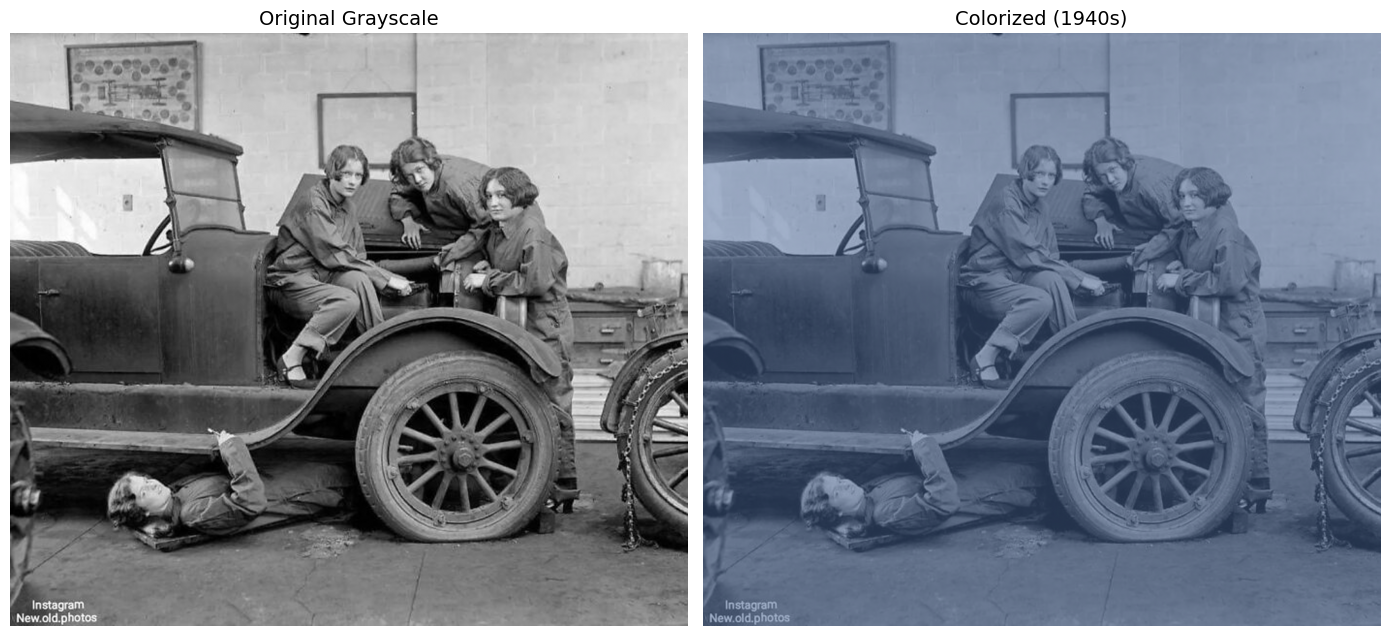

In [ ]:
show_images(gray_image, colorized_image, predicted_era)


In [ ]:
# Manually select an era from dropdown
print("Available Eras:", eras)
manual_era = input("✍️ Enter era to override prediction (or press Enter to skip): ")

if manual_era in eras:
    manual_colorized = colorize_by_era(gray_image, manual_era)
    show_images(gray_image, manual_colorized, manual_era)
else:
    print("✅ No override applied.")


Available Eras: ['1880s', '1900s', '1920s', '1940s', '1960s']
✍️ Enter era to override prediction (or press Enter to skip): 1880
✅ No override applied.
